<pre><div style="text-align:center">Shon Otmazgin    Sapir Rubin</div><div style="text-align:center">305394975        301659751</div></pre>

### Abstract
Credit card Supervised learning has been widely used to detect anomaly in credit card transaction records based on the assumption that the pattern of a fraud would depend on the past transaction. However, unsupervised learning does not ignore the fact that the fraudsters could change their approaches based on customers’ behaviors and patterns. In this study, three unsupervised methods were presented including GMM, K-means, and DB scan. The dataset used in this study is based on real-life data of credit card transaction. Due to the availability of the response, fraud labels, after training the models the performance of each model was evaluated. The performance of these three methods is discussed extensively in this paper.

### Dataset 
The dataset that is used for credit card fraud detection is derived from the following [URL](https://eur02.safelinks.protection.outlook.com/?url=https%3A%2F%2Fdata.world%2Fraghu543%2Fcredit-card-fraud-data&amp;data=02%7C01%7CYael.Madar%40biu.ac.il%7Cb48189911f224aef8c2e08d79ff0c5e6%7C61234e145b874b67ac198feaa8ba8f12%7C0%7C0%7C637153728776732928&amp;sdata=tzNpfPA2qlY12Dp1Zli5FW5ugw0Q05OaTCay5mAvo4c%3D&amp;reserved=0)

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Due to confidentiality issues, there are not provided the original features and more background information about the data.
It contains only numerical input variables which are the result of a PCA transformation.

- Features V1, V2, ... V28 are the principal components obtained with PCA;
- The only features which have not been transformed with PCA are Time and Amount.
 - Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset.
 - The feature Amount is the transaction Amount.
- Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Problem Statement Task:

The Credit Card Fraud Detection Problem includes past credit card transactions. we need to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.
Let's realize that we are looking for a needle in a hay barn. 99% of the data are normal transactions. We could balance the data by oversampling or undersampling. But we want our models to be able to produce results in the real word not just in testing environment. This is why we should use the unbalanced data, in order to better simulate real world cases. If our model can identify even a fraction of fraud cases, it is adding value.

#### Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_STATE = 2020

C:\Users\sotmazgi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Exploration and visualization

In [3]:
df = pd.read_csv("../dataset/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [25]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).

#### Check missing data

In [26]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.

#### Class Distribution

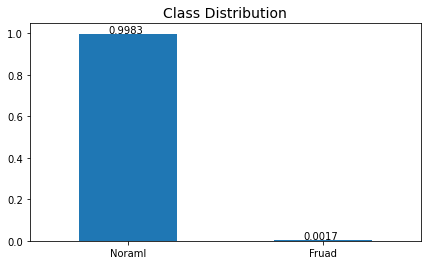

In [198]:
ax = df['Class'].value_counts(normalize=True).plot(kind='bar',  figsize=(7,4))
for i, v in enumerate(class_dist.values):
    ax.text(i - 0.1, v + 0.005, str(round(v, 4)))
ax.set_xticklabels(['Noraml', 'Fruad'],rotation=0)
ax.set_title('Class Distribution', fontsize=14)

plt.show()

Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.  
reminder - Unsupervised Learning is a process of training a machine learning model on a dataset in which target variable is unknown

#### Transactions Time and Amount Distributions

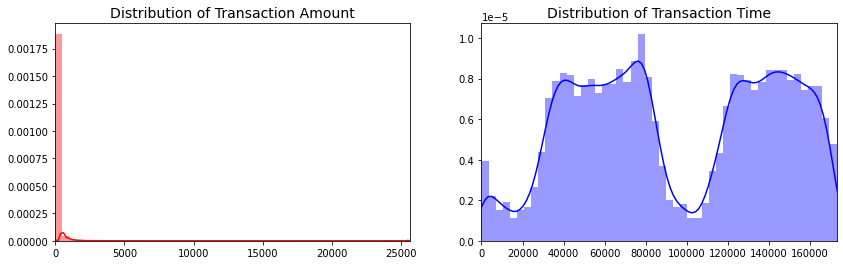

In [145]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

- Most transactions are small amounts, less than $100.
- Clearly, it looks like there are cycles in Time.

#### Transactions Time and Amount Distributions by Class

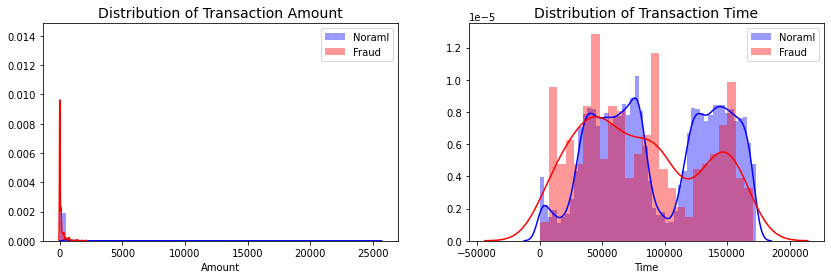

In [156]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

time_class_0 = df.loc[df['Class'] == 0]["Time"]
time_class_1 = df.loc[df['Class'] == 1]["Time"]
amount_class_0 = df.loc[df['Class'] == 0]["Amount"]
amount_class_1 = df.loc[df['Class'] == 1]["Amount"]

sns.distplot(amount_class_0, ax=ax[0], color='b' ,hist=True, label='Noraml')
sns.distplot(amount_class_1, ax=ax[0], color='r' ,hist=True, label='Fraud')

sns.distplot(time_class_0, ax=ax[1], color='b' ,hist=True, label='Noraml')
sns.distplot(time_class_1, ax=ax[1], color='r' ,hist=True, label='Fraud', bins=25)

ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].legend()
ax[1].legend()
plt.show()

- The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.
- Most transactions are small amounts, less than $100. Fraudulent transactions have a maximum value far less than normal transactions, 2K vs 25k.


Now let's see if the transaction amount differs between the two types.

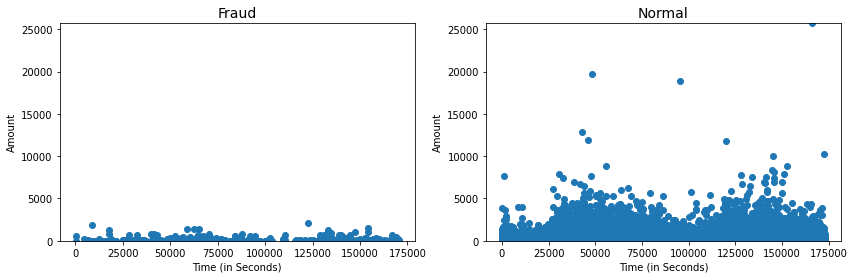

In [167]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud', fontsize=14)
ax1.set_ylim([min(amount_val), max(amount_val)])
ax1.set_ylabel('Amount')
ax1.set_xlabel('Time (in Seconds)')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal', fontsize=14)
ax2.set_ylim([min(amount_val), max(amount_val)])
ax2.set_ylabel('Amount')
ax2.set_xlabel('Time (in Seconds)')

plt.show()

Both types equally distributed over time. y-axis is signiffly different between fraud and normal transactions.

#### Outliers removal
Our main aim in this section is to remove "extreme outliers" from features. This will have a positive impact on the accuracy of our models.

#### Interquartile Range Method:
- **Interquartile Range (IQR)**: We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.
- **Boxplots**: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).

#### Outlier Removal Tradeoff:
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.


The Tradeoff: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

#### Features distribution fit with Gaussian distribution

<Figure size 432x288 with 0 Axes>

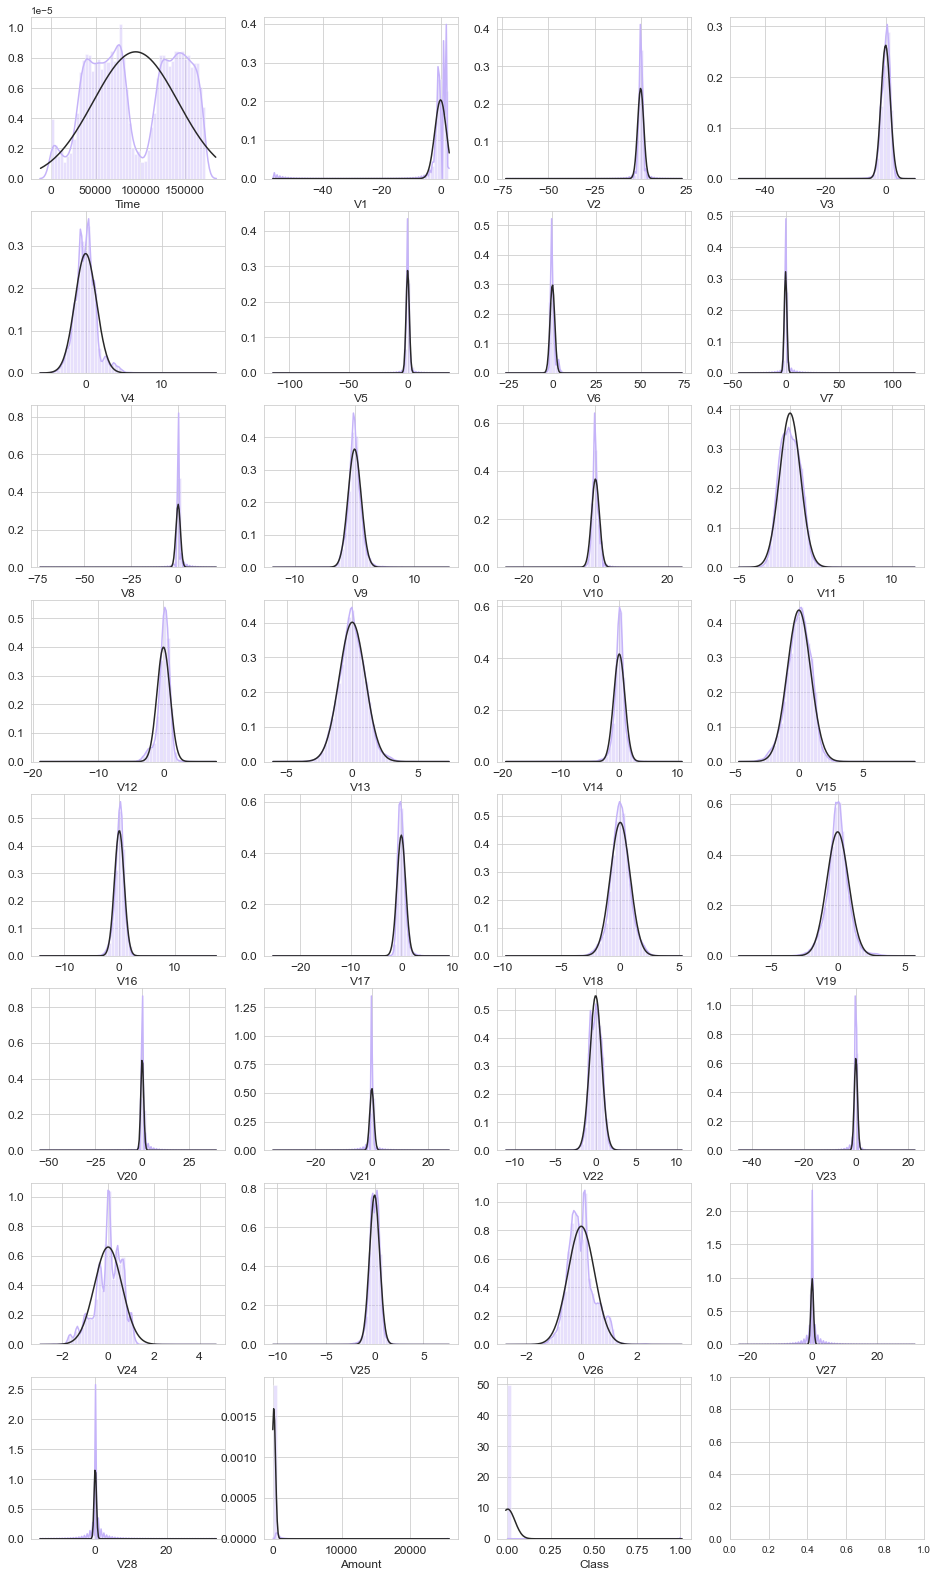

In [271]:
var = df.columns.values

i = 0

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.distplot(df[feature], fit=norm, color='#C5B3F9')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

For some of the features we can observe a good selectivity in terms of distribution.

In general, with just few exceptions (Time and Amount), the features distribution for transactions is centered around 0, sometime with a long queue at one of the extremities.

#### Summary:
- **Visualize Distributions**: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.
- **Determining the threshold**: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
- **Conditional Dropping**: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
- **Boxplot Representation**: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

<Figure size 432x288 with 0 Axes>

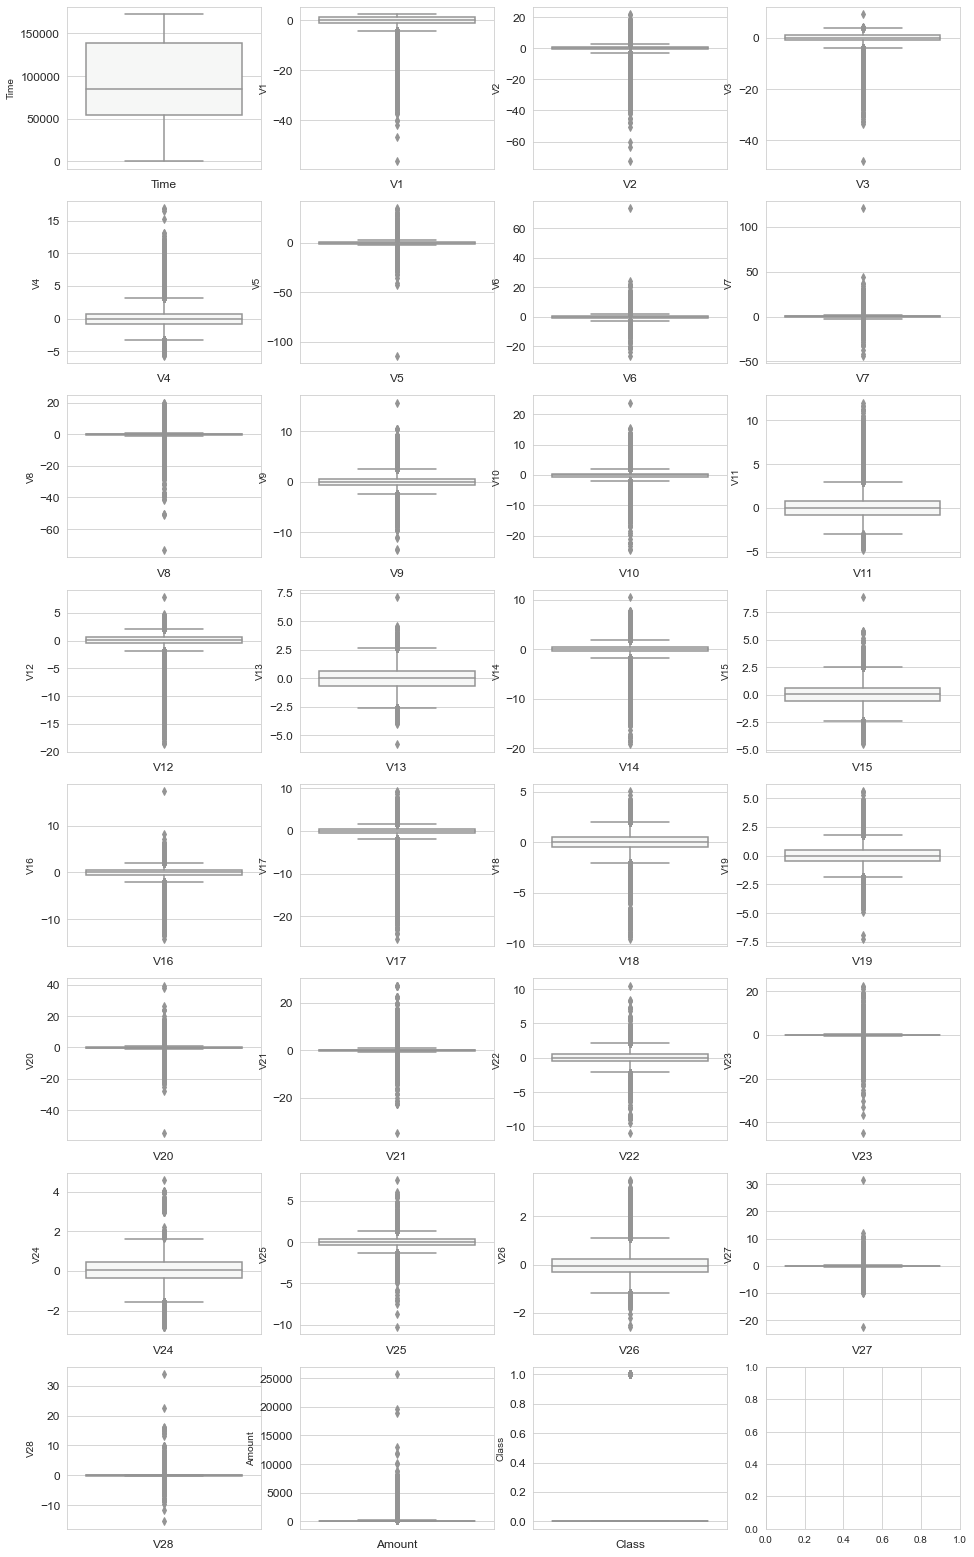

In [279]:
var = df.columns.values

i = 0

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    s = sns.boxplot(y=feature, hue="Class",data=df, palette="PRGn",showfliers=True)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [228]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
amount = df['Amount'].values
q25, q75 = np.percentile(amount, 25), np.percentile(amount, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
amount_iqr = q75 - q25
print('iqr: {}'.format(amount_iqr))

amount_cut_off = amount_iqr * 1.5
amount_lower, amount_upper = q25 - amount_cut_off, q75 + amount_cut_off
print('Cut Off: {}'.format(amount_cut_off))
print('amount Lower: {}'.format(amount_lower))
print('amount Upper: {}'.format(amount_upper))

outliers = [x for x in amount if x < amount_lower or x > amount_upper]
print('Feature amount Outliers Cases: {}'.format(len(outliers)))
# print('V10 outliers:{}'.format(outliers))

Quartile 25: 5.6 | Quartile 75: 77.16499999999999
iqr: 71.565
Cut Off: 107.3475
amount Lower: -101.7475
amount Upper: 184.5125
Feature amount Outliers Cases: 31904


The normal transaction have a larger median value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

#### Features correlation

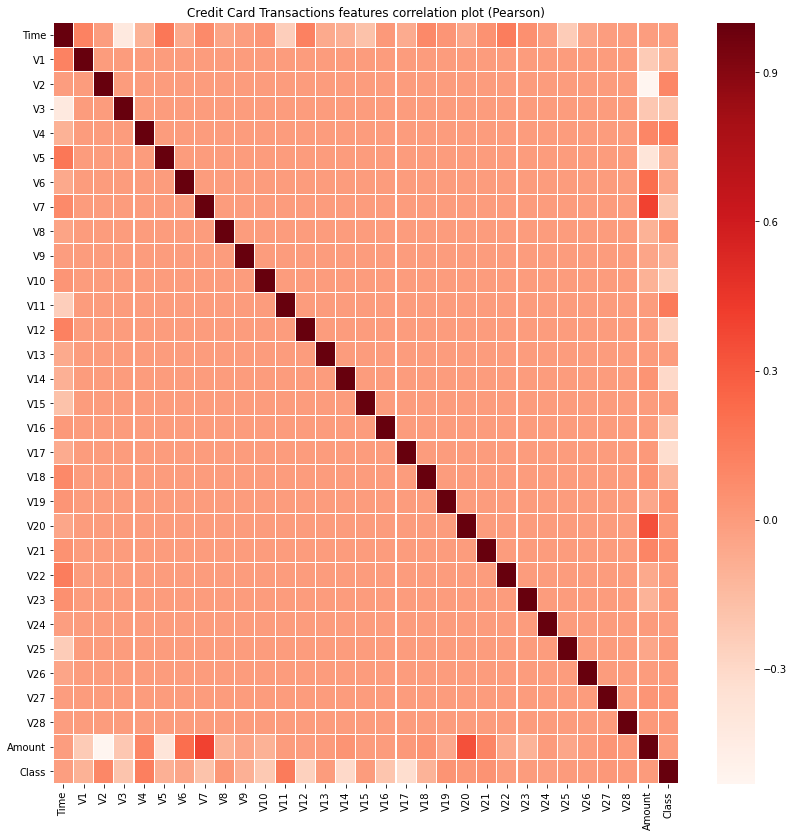

In [12]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

#### Scaling
In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns.

In [304]:
df = pd.read_csv("dataset/creditcard.csv")

In [305]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from scipy.stats import zscore

In [306]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# RobustScaler is less prone to outliers.

minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [308]:
X = df.drop('Class', axis=1)
y = df['Class']

#### Statistical hypothesis testing

In [309]:
# fraud = df.loc[df['Class'] == 1]
# non_fraud = df.loc[df['Class'] == 0]

# new_df = pd.concat([fraud, non_fraud]).sample(frac=1.).reset_index(drop=True)
# X = new_df.drop('Class', axis=1)
# y = new_df['Class']

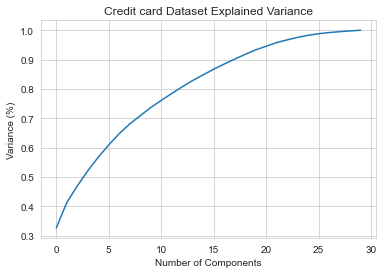

Wall time: 987 ms


In [310]:
%%time
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Credit card Dataset Explained Variance')
plt.show()

In [313]:
%%time
from sklearn.decomposition import PCA

# PCA Implementation
X_reduced_pca_2 = PCA(n_components=2, randomX_state=42).fit_transform(X)

Wall time: 1.57 s


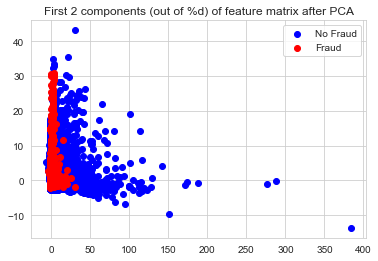

In [322]:
fig, ax1 = plt.subplots(ncols=1)

# PCA
ax1.scatter(X_reduced_pca_2[y[y == 0].index, 0], X_reduced_pca_2[y[y == 0].index, 1], cmap='coolwarm', label='No Fraud', color='blue')
ax1.scatter(X_reduced_pca_2[y[y == 1].index, 0], X_reduced_pca_2[y[y == 1].index, 1], cmap='coolwarm', label='Fraud', color='red')
ax1.set_title('First 2 components (out of %d) of feature matrix after PCA')

# plt.savefig(name + '.tif')
plt.legend()
plt.show()

In [158]:
from sklearn.mixture import GaussianMixture

In [325]:
%%time
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X) for n in n_components]

Wall time: 14min 19s


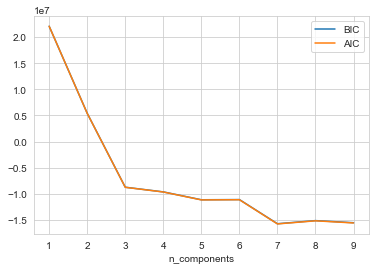

In [326]:
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [327]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

In [328]:
%time

lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, random_state=42)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

Wall time: 0 ns


In [330]:
print(f'Selected GMM: {best_gmm.covariance_type} model, {best_gmm.n_components} components')

Selected GMM: full model, 7 components


In [331]:
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

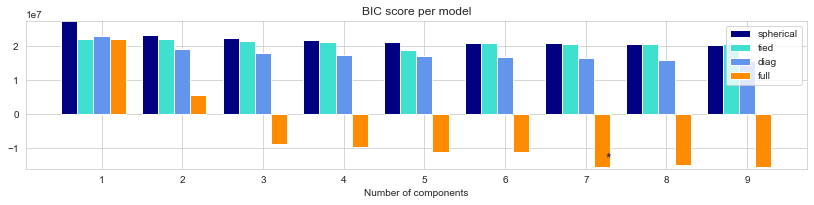

In [332]:
# Plot the BIC scores
plt.figure(figsize=(14,6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [333]:
# # Plot the winner
# splot = plt.subplot(2, 1, 2)
# Y_ = clf.predict(X)
# for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
#                                            color_iter)):
#     v, w = linalg.eigh(cov)
#     if not np.any(Y_ == i):
#         continue
#     plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

#     # Plot an ellipse to show the Gaussian component
#     angle = np.arctan2(w[0][1], w[0][0])
#     angle = 180. * angle / np.pi  # convert to degrees
#     v = 2. * np.sqrt(2.) * np.sqrt(v)
#     ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#     ell.set_clip_box(splot.bbox)
#     ell.set_alpha(.5)
#     splot.add_artist(ell)

# plt.xticks(())
# plt.yticks(())
# plt.title(f'Selected GMM: {clf.covariance_type} model, {clf.n_components} components')
# plt.subplots_adjust(hspace=.35, bottom=.02)
# plt.show()

In [394]:
%%time
count = 0
tp = 0
scores = []
for i,s in enumerate(X.values):
    scores.append([i, clf.predict_proba(s.reshape(1, -1)).argmax(), clf.predict_proba(s.reshape(1, -1)).max(), clf.score(s.reshape(1, -1)), y[i]])

Wall time: 3min 2s


In [473]:
logs = clf.score_samples(X)

In [476]:
logs

array([ 5.55102416, 61.79388624,  5.7632648 , ..., 58.01841195,
       -1.03376573, 19.04796859])

In [480]:
cdf = np.cumsum(logs)

In [482]:
for i,v in enumerate(cdf):
    if cdf[i] > cdf[i+1] + 50:
        print(i+1)

140
164
174
370
401
455
460
472
541
725
1027
1032
1388
1632
1722
1753
1815
1922
2016
2059
2178
2234
2277
2457
2464
2475
2622
2629
2678
2682
2792
2897
2951
2954
2956
2957
2963
3099
3509
3554
3684
3761
3771
4235
4415
4622
4675
4687
4740
4776
4816
4822
4839
4895
4898
4920
4926
4935
4950
5022
5102
5119
5306
5371
5425
5443
5504
5512
5526
5534
5535
5652
5714
5791
5797
5827
5888
5916
6095
6108
6241
6275
6300
6305
6306
6331
6334
6336
6338
6424
6427
6446
6467
6471
6472
6501
6529
6549
6609
6612
6624
6633
6641
6717
6719
6734
6757
6774
6783
6812
6820
6869
6870
6882
6899
6903
6905
6940
6947
6958
6969
6971
7012
7057
7074
7075
7080
7081
7090
7098
7104
7108
7127
7144
7163
7164
7178
7243
7246
7255
7277
7301
7362
7413
7420
7469
7485
7522
7523
7527
7539
7570
7574
7578
7596
7609
7617
7675
7743
7744
7766
7778
8089
8296
8311
8312
8335
8433
8447
8453
8480
8487
8488
8572
8610
8615
8617
8625
8683
8781
8802
8820
8842
8845
8855
8972
8973
9026
9027
9028
9029
9035
9044
9055
9119
9179
9252
9258
9337
9347
9487
9489


135450
135461
135718
135720
136127
136568
136694
136737
137024
137207
137218
137229
137260
137261
137273
137287
137298
137311
137506
137611
137618
137686
137705
137781
137961
138215
138230
138322
138412
138461
138462
138463
138464
138474
138706
138713
138719
138926
138953
138980
139217
139239
139280
139428
139526
139619
139713
139719
139734
139737
139808
139985
140178
140207
140218
140471
140478
140493
140550
140565
140654
140773
140786
140804
140902
141066
141123
141253
141257
141258
141259
141260
141284
141318
141338
141341
141357
141373
141383
141416
141422
141480
141500
142137
142297
142340
142353
142405
142418
142436
142494
142495
142562
142699
142855
142871
142950
142984
143026
143046
143056
143064
143081
143087
143096
143122
143156
143162
143188
143207
143209
143294
143333
143334
143335
143336
143428
143506
143564
143600
143605
143616
143728
143731
143806
143947
144036
144077
144083
144095
144104
144108
144226
144271
144325
144457
144470
144475
144686
145022
145090
145140
145182

194798
194854
194878
194895
194938
195068
195069
195074
195083
195195
195199
195218
195238
195328
195368
195427
195449
195478
195631
195688
195705
195718
195784
195813
195818
195821
195827
195845
195950
196053
196094
196095
196124
196136
196166
196211
196288
196397
196503
196515
196583
196651
196654
196669
196685
196739
196785
196832
196838
197005
197099
197151
197190
197271
197287
197426
197477
197601
197675
197725
197735
197745
198012
198058
198131
198168
198232
198290
198300
198313
198316
198373
198375
198379
198419
198466
198512
198658
198868
198974
198985
199032
199379
199538
199547
199559
199603
199624
199637
199663
199670
199679
199710
199750
199810
199831
199847
199874
199894
199896
199907
199955
200079
200226
200331
200371
200377
200478
200644
200790
200824
200912
200914
200985
201098
201189
201211
201216
201240
201258
201291
201421
201431
201514
201538
201597
201601
201638
201649
201718
201723
201752
201769
201775
201869
201932
202060
202109
202163
202165
202174
202187
202369

265708
265765
265795
265961
266105
266156
266202
266331
266335
266426
266434
266590
266600
266668
266704
266724
266799
266881
266928
267024
267042
267151
267250
267339
267414
267447
267493
267497
267760
267944
268181
268221
268364
268375
268390
268452
268491
268556
268651
268696
268697
268698
268699
268880
268989
269214
269217
269356
269532
269640
269718
269884
269927
269972
269997
270101
270181
270204
270285
270313
270396
270399
270482
270685
270737
270975
271025
271152
271355
271360
271372
271451
271477
271561
271613
271635
271642
271672
271719
271748
271762
271772
271773
271810
271853
271857
271944
271947
271962
271973
271980
272021
272113
272259
272521
272580
272633
272634
272635
272636
272644
272672
272731
272747
272953
273179
273286
273514
273715
273747
273987
274328
274382
274396
274443
274453
274468
274475
274514
274520
274549
274552
274661
274674
274697
274771
275065
275286
275317
275322
275373
275518
275653
275727
275751
275752
275756
275761
275762
275763
275764
276061
276105

IndexError: index 284807 is out of bounds for axis 0 with size 284807

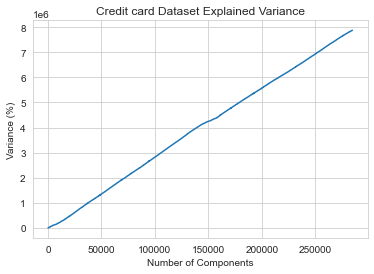

Wall time: 317 ms


In [475]:
%%time
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot()
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Credit card Dataset Explained Variance')
plt.show()

In [462]:
print(clf.score(X[541:542]))

-56.410795570224984


In [444]:
scores

[[0, 1, 0.9999999999992699, 5.551024163009991, 0],
 [1, 3, 1.0, 61.793886241199935, 0],
 [2, 2, 0.999999999999944, 5.763264804373945, 0],
 [3, 2, 0.9999995865232789, 13.522295822895801, 0],
 [4, 1, 0.9999999400693378, 4.029074376592905, 0],
 [5, 0, 0.999999991849819, 38.24984297422627, 0],
 [6, 3, 1.0, 60.73568722965519, 0],
 [7, 4, 1.0, -17.52389162710866, 0],
 [8, 1, 0.9999999997305311, 2.7864184371772085, 0],
 [9, 0, 0.9999999999999858, 49.52580528208551, 0],
 [10, 0, 1.0, 54.44645645417364, 0],
 [11, 1, 0.9999999608077383, 0.6148940391008243, 0],
 [12, 0, 1.0, 54.38574631598132, 0],
 [13, 3, 1.0, 61.33139282036415, 0],
 [14, 5, 0.9999999998939089, -34.057328177233586, 0],
 [15, 1, 0.9999999999999993, -1.6395880545823802, 0],
 [16, 3, 1.0, 61.94143280772607, 0],
 [17, 2, 0.9999999999996021, 17.80786702291764, 0],
 [18, 5, 0.9999999828324208, -41.2450821016715, 0],
 [19, 0, 1.0, 55.66034197818277, 0],
 [20, 3, 1.0, 55.80540288996357, 0],
 [21, 3, 1.0, 51.937617911429065, 0],
 [22, 3,

In [449]:
tp = [s for s in scores if s[4] == 1]

In [450]:
tp

[[541, 6, 1.0, -56.410795570224984, 1],
 [623, 2, 1.0, 5.838672871762134, 1],
 [4920, 6, 1.0, -66.04411330389065, 1],
 [6108, 6, 1.0, -65.20687392809036, 1],
 [6329, 3, 1.0, -40.88193652624697, 1],
 [6331, 6, 1.0, -72.86098218358204, 1],
 [6334, 6, 1.0, -72.47094398053592, 1],
 [6336, 6, 1.0, -74.59514994470327, 1],
 [6338, 6, 1.0, -73.43983307415023, 1],
 [6427, 6, 1.0, -67.52296067120676, 1],
 [6446, 6, 1.0, -67.80930551973924, 1],
 [6472, 6, 1.0, -68.85785895067862, 1],
 [6529, 6, 1.0, -59.475556430458724, 1],
 [6609, 6, 1.0, -59.934191745510034, 1],
 [6641, 6, 1.0, -70.99113322825745, 1],
 [6717, 6, 1.0, -79.89347768193467, 1],
 [6719, 6, 1.0, -72.01122587570192, 1],
 [6734, 6, 1.0, -67.12124864820672, 1],
 [6774, 6, 1.0, -67.20201157851568, 1],
 [6820, 6, 1.0, -59.369639287902984, 1],
 [6870, 6, 1.0, -59.492923049051655, 1],
 [6882, 6, 1.0, -62.96312980850007, 1],
 [6899, 6, 1.0, -72.97232854391412, 1],
 [6903, 6, 1.0, -73.0649017520456, 1],
 [6971, 6, 1.0, -59.79888835655771, 1],

In [413]:
len([t for t in scores if t[1] == 6 and t[3] <= -70])

620

In [417]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
y_pred = kmeans.fit_predict(X)

In [443]:
np.linalg.norm.

'auto'

In [426]:
%%time
count = 0
tp = 0
scores_2 = []
for i,s in enumerate(X.values):
    scores_2.append([i, kmeans.predict(s.reshape(1, -1))[0], kmeans.score(s.reshape(1, -1)), y[i]])

Wall time: 2min 39s


In [427]:
tp = [s for s in scores_2 if s[3] == 1]

In [440]:
([t for t in scores_2 if t[2] <= -500])

[[1632, 3, -3971.0583597987334, 0],
 [2234, 2, -512.738558892926, 0],
 [2464, 0, -637.8850344773595, 0],
 [2622, 3, -671.4025938628906, 0],
 [2682, 2, -549.5371594241926, 0],
 [2951, 2, -934.093796678636, 0],
 [2954, 2, -900.8564329225997, 0],
 [2957, 2, -889.0564030478308, 0],
 [2963, 2, -967.446733544791, 0],
 [3509, 2, -649.958038632228, 0],
 [5534, 2, -1260.8691864683606, 0],
 [5535, 2, -1250.621067361222, 0],
 [5652, 2, -961.6115618697384, 0],
 [5827, 2, -905.2118204038488, 0],
 [6108, 4, -502.15684620130634, 1],
 [6624, 2, -1242.776629404756, 0],
 [6717, 4, -510.4979477057971, 1],
 [6719, 5, -510.19493789690426, 1],
 [6812, 6, -1686.1115662543036, 0],
 [6882, 2, -510.2165350677282, 1],
 [6899, 2, -501.13767802287003, 1],
 [6903, 2, -503.9781284180527, 1],
 [7420, 4, -540.6675562390014, 0],
 [7743, 2, -1237.6669257850967, 0],
 [7744, 2, -909.423361752649, 0],
 [8296, 2, -1719.1034684245706, 1],
 [8335, 2, -1571.6548888363434, 1],
 [8610, 0, -5023.283259172904, 0],
 [8615, 2, -1692

In [439]:
([t for t in tp if t[2] <= -500])

[[6108, 4, -502.15684620130634, 1],
 [6717, 4, -510.4979477057971, 1],
 [6719, 5, -510.19493789690426, 1],
 [6882, 2, -510.2165350677282, 1],
 [6899, 2, -501.13767802287003, 1],
 [6903, 2, -503.9781284180527, 1],
 [8296, 2, -1719.1034684245706, 1],
 [8335, 2, -1571.6548888363434, 1],
 [8615, 2, -1692.6475062929562, 1],
 [8842, 2, -500.77175458370675, 1],
 [9035, 2, -1709.46854605081, 1],
 [9179, 2, -1545.1478603760893, 1],
 [9252, 2, -1669.7935987687504, 1],
 [9487, 2, -1694.488523455757, 1],
 [9509, 2, -1693.635256199235, 1],
 [10568, 2, -1695.399435719736, 1],
 [10630, 2, -1692.8694820841158, 1],
 [10690, 6, -2383.7654768416064, 1],
 [10801, 2, -1839.5304324985161, 1],
 [10891, 2, -1702.9904178083839, 1],
 [10897, 2, -1842.7552667913696, 1],
 [11343, 2, -1883.045327054875, 1],
 [11710, 2, -1903.7409696617817, 1],
 [11841, 2, -1927.1342978011148, 1],
 [11880, 2, -1953.2289100149706, 1],
 [12070, 2, -1982.0115743857923, 1],
 [12108, 2, -2013.4961056334175, 1],
 [12261, 2, -2047.6687483

In [285]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [286]:
wss = calculate_WSS(X_reduced_pca_2, 20)

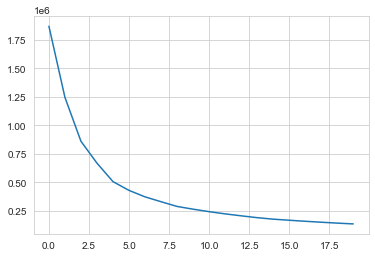

In [288]:
plt.plot(wss)

In [68]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
confusion_matrix = confusion_matrix(y, y_pred)
print('precision', precision)
print('recall', recall)
print(confusion_matrix)

precision 0.9941520467836257
recall 0.34552845528455284
[[2999    1]
 [ 322  170]]


In [69]:
from sklearn.metrics import roc_auc_score

print('Kmeans: ', roc_auc_score(y, y_pred))

Kmeans:  0.6725975609756097


### Methods
Clustering-Based Anomaly Detection
Clustering is one of the most popular concepts in the domain of unsupervised learning.

Assumption: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids.

K-means is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies.

In [57]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

tic=time.time()
full_data=pd.read_csv("dataset/creditcard.csv")
full_data=full_data.sample(frac=1)#randomize the whole dataset
full_features=full_data.drop(["Time","Class"],axis=1)
full_labels=pd.DataFrame(full_data[["Class"]])
full_features_array=full_features.values
full_labels_array=full_labels.values
train_features,test_features,train_labels,test_labels=train_test_split(full_features_array,full_labels_array,train_size=0.90)
train_features=normalize(train_features)
test_features=normalize(test_features)
#k_means_classification --> k_means_clustering, confsion_matrix, reassigning
kmeans=KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=10000,n_jobs=-1)
kmeans.fit(train_features)
kmeans_predicted_train_labels=kmeans.predict(train_features)
#confusion matrix
# tn fp
# fn tp
print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")
tn,fp,fn,tp=confusion_matrix(train_labels,kmeans_predicted_train_labels).ravel()
reassignflag=False
if tn+tp<fn+fp:
	# clustering is opposite of original classification
	reassignflag=True
kmeans_predicted_test_labels=kmeans.predict(test_features)
if reassignflag:
	kmeans_predicted_test_labels=1-kmeans_predicted_test_labels
#calculating confusion matrix for kmeans
tn,fp,fn,tp=confusion_matrix(test_labels,kmeans_predicted_test_labels).ravel()
#scoring kmeans
kmeans_accuracy_score=accuracy_score(test_labels,kmeans_predicted_test_labels)
kmeans_precison_score=precision_score(test_labels,kmeans_predicted_test_labels)
kmeans_recall_score=recall_score(test_labels,kmeans_predicted_test_labels)
kmeans_f1_score=f1_score(test_labels,kmeans_predicted_test_labels)
#printing
print("")
print("K-Means")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",kmeans_accuracy_score)
print("Precison -->",kmeans_precison_score)
print("Recall -->",kmeans_recall_score)
print("F1 -->",kmeans_f1_score)

#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree",n_jobs=-1)
knn.fit(train_features,train_labels.ravel())
knn_predicted_test_labels=knn.predict(test_features)
#calculating confusion matrix for knn
tn,fp,fn,tp=confusion_matrix(test_labels,knn_predicted_test_labels).ravel()
#scoring knn
knn_accuracy_score=accuracy_score(test_labels,knn_predicted_test_labels)
knn_precison_score=precision_score(test_labels,knn_predicted_test_labels)
knn_recall_score=recall_score(test_labels,knn_predicted_test_labels)
knn_f1_score=f1_score(test_labels,knn_predicted_test_labels)
#printing
print("")
print("K-Nearest Neighbours")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)

#time elapsed
toc=time.time()
elapsedtime=toc-tic
print("")
print("Time Taken : "+str(elapsedtime)+"seconds")

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives

K-Means
Confusion Matrix
tn = 22548 fp = 5886
fn = 18 tp = 29
Scores
Accuracy --> 0.7927039078684035
Precison --> 0.004902789518174133
Recall --> 0.6170212765957447
F1 --> 0.009728279100972827

K-Nearest Neighbours
Confusion Matrix
tn = 28426 fp = 8
fn = 14 tp = 33
Scores
Accuracy --> 0.9992275552122467
Precison --> 0.8048780487804879
Recall --> 0.7021276595744681
F1 --> 0.7500000000000001

Time Taken : 25.955514192581177seconds


In [66]:
len(train_labels.ravel())

256326

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)